# Gépi tanulás féléves feladat - Dézsi Csaba István - bdigne
## Kezdjük az adatok elemzésével, illetve, ha szükséges, az adathalmaz tisztításával

In [1253]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1254]:
#DATA CLEANING
#getting rid of not needed columns
ignData = pd.read_csv("ign.csv")

ignData = ignData.drop('Unnamed: 0', axis=1)
ignData = ignData.drop('url', axis=1)
ignData = ignData.drop('editors_choice', axis=1)
ignData = ignData.drop('title', axis=1)
ignData = ignData.drop('score_phrase', axis=1)

ignData


,platform,score,genre,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,2012,9,12
1,PlayStation Vita,9.0,Platformer,2012,9,12
2,iPad,8.5,Puzzle,2012,9,12
3,Xbox 360,8.5,Sports,2012,9,11
4,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,PlayStation 4,5.8,RPG,2016,6,28
18623,Xbox One,10.0,Adventure,2016,6,28


>>> adattípusok(dtypes):  [dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
>>> hiányzó adatok százaléka:  [0.0, 0.0, 0.19328859060402684, 0.0, 0.0, 0.0]


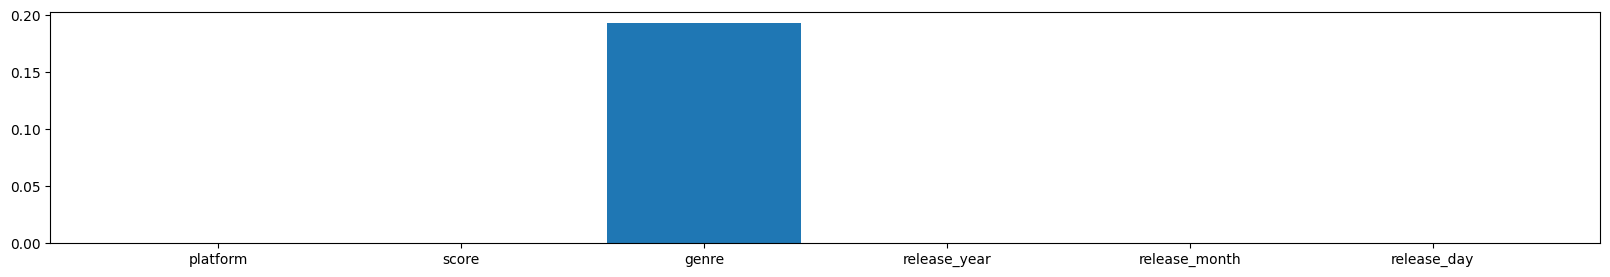

>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN
>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk:  ['genre']
>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:
	- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns
	- Tisztítást követő méret: 18589 rows × 8 columns


,platform,score,genre,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,2012,9,12
1,PlayStation Vita,9.0,Platformer,2012,9,12
2,iPad,8.5,Puzzle,2012,9,12
3,Xbox 360,8.5,Sports,2012,9,11
4,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,PlayStation 4,5.8,RPG,2016,6,28
18623,Xbox One,10.0,Adventure,2016,6,28


In [1255]:
#adat típusok és hiányzó adatok ellenőrzése, elemzése, esetleges kezelése

dtypes = list()
for dtype in ignData.dtypes:
    dtypes.append(dtype)

print('>>> adattípusok(dtypes): ', dtypes)
#------------------------------------------

ign_values_list = list()
cols_list = list()
for col in ignData.columns:
    pct_missing = np.mean(ignData[col].isnull())*100
    cols_list.append(col)
    ign_values_list.append(pct_missing)
print('>>> hiányzó adatok százaléka: ', ign_values_list)
#------------------------------------------


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = ign_values_list

plt.figure(figsize=(20, 3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()
print('>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN')
#------------------------------------------

less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.4) & (pct_missing_df.pct_missing > 0), 'col'].values)
ignData.dropna(subset=less_missing_values_cols_list, inplace=True)

print('>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk: ', less_missing_values_cols_list)

print('>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:')
print('\t- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns')
print('\t- Tisztítást követő méret: 18589 rows × 8 columns')
ignData

### Stringek int-é alakítása

In [1256]:
#a biztonság kedvéért inkább copy-zok, nehogy elcsesszek valamit, mert akkor futtathatjuk úrja az elejétől
copiedData = ignData.copy()

#platform oszlop distinct elemeinek száma
platformCol = copiedData['platform']
platformNames = platformCol.drop_duplicates()
uniquePlatform = platformNames.count()

#genre distinct ertekei
genreCol = copiedData['genre']
genreNames = genreCol.drop_duplicates()
uniqueGenre = genreNames.count()

print('num of unique platforms =',uniquePlatform, ', num of unique genres =',uniqueGenre)
platformIndexes = []
genreIndexes = []

i=0
for platformName in platformCol:
    if (platformNames.values.__contains__(platformName)):
        index, = np.where(platformNames.values == platformName)
        platformIndexes.append(index[0])
    i+=1

i=0
for genreName in genreCol:
    if (genreNames.values.__contains__(genreName)):
        index, = np.where(genreNames.values == genreName)
        genreIndexes.append(index[0])
    i+=1


copiedData['platform'] = platformIndexes
copiedData['genre'] = genreIndexes

print('Lehet látni, hogy szépen át lett minden string alakítva int-re')
copiedData

num of unique platforms = 59 , num of unique genres = 112
Lehet látni, hogy szépen át lett minden string alakítva int-re


,platform,score,genre,release_year,release_month,release_day
0,0,9.0,0,2012,9,12
1,0,9.0,0,2012,9,12
2,1,8.5,1,2012,9,12
3,2,8.5,2,2012,9,11
4,3,8.5,2,2012,9,11
...,...,...,...,...,...,...
18620,12,7.6,5,2016,6,29
18621,11,9.0,6,2016,6,29
18622,11,5.8,5,2016,6,28
18623,54,10.0,7,2016,6,28


## Most, hogy megvan az adattisztítás kezdjül el felépíteni a train és teszt adatainkat

In [1257]:
from sklearn.model_selection import train_test_split
import torch

In [1258]:
#első körben szétválasztjuk a be és kimeneti adatainkat, majd ezeket sétszedjük a megszokott módon train és teszt adathalmazokba
X, y = copiedData.drop('score', axis=1), copiedData['score']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

y_train, y_test

(386      7.9
 3186     9.6
 8903     7.9
 5825     6.0
 394      7.7
         ... 
 2240     7.0
 13140    5.5
 5479     3.3
 4174     7.8
 10135    5.5
 Name: score, Length: 13012, dtype: float64,
 7100     8.7
 458      4.0
 11639    7.0
 17837    8.8
 15847    3.0
         ... 
 17579    3.0
 10486    4.0
 10471    7.5
 14515    8.8
 17693    9.0
 Name: score, Length: 5577, dtype: float64)

In [1259]:
X_train_raw

,platform,genre,release_year,release_month,release_day
386,5,7,2012,12,4
3186,28,10,2001,6,18
8903,2,2,2007,1,16
5825,32,6,2004,6,3
394,6,8,2013,1,3
...,...,...,...,...,...
2240,15,13,2000,6,21
13140,6,3,2009,7,13
5479,36,2,2003,12,10
4174,32,8,2002,10,17


In [1260]:
X_test_raw

,platform,genre,release_year,release_month,release_day
7100,31,2,2005,9,7
458,15,8,1996,11,25
11639,10,4,2008,10,14
17837,0,8,2014,8,12
15847,10,8,2011,5,31
...,...,...,...,...,...
17579,11,8,2014,3,6
10486,7,17,2008,1,28
10471,5,35,2008,1,29
14515,6,53,2010,5,14


## Kezdjük el a modellek definiálását és feltanítását

In [1261]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    #nn.ReLU(),
    #nn.Linear(5, 1)
)

In [1262]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
opt = optim.Adam(model.parameters(), lr=0.001)

In [1263]:
import tqdm
import copy
import torch
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

epochs = 20
batch_size = 8 # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch+1}")
        for start in bar:
            # take a batch
            X_batch = X_train[start : start+batch_size]
            y_batch = y_train[start : start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            opt.zero_grad()
            loss.backward()
            # update weights
            opt.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    mse = float(loss)
    history.append(mse)
    plt.plot(history)
    plt.show()
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

model.load_state_dict(best_weights)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

Epoch 6:  26%|██▌       | 427/1627 [00:01<00:03, 316.39batch/s, mse=2.95] 

In [ ]:
model.eval()
testResults = []
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(20):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)

        
        result = round(y_pred[0].numpy()[0]*1.0, 2)
        expected = round(y_test[i].numpy()[0]*1.0, 2)
        print(f'result = {result}, expected = {expected}, inference: {round(result-expected), 2}')
testResults


result = 7.04, expected = 8.7, inference: (-2, 2)
result = 6.87, expected = 6.0, inference: (1, 2)
result = 7.18, expected = 9.3, inference: (-2, 2)
result = 6.9, expected = 8.3, inference: (-1, 2)
result = 6.56, expected = 3.2, inference: (3, 2)
result = 6.91, expected = 5.7, inference: (1, 2)
result = 6.87, expected = 8.6, inference: (-2, 2)
result = 7.52, expected = 7.5, inference: (0, 2)
result = 6.68, expected = 7.0, inference: (0, 2)
result = 6.9, expected = 9.4, inference: (-2, 2)
result = 7.0, expected = 5.0, inference: (2, 2)
result = 7.17, expected = 5.0, inference: (2, 2)
result = 6.96, expected = 8.2, inference: (-1, 2)
result = 7.28, expected = 8.8, inference: (-2, 2)
result = 7.25, expected = 8.0, inference: (-1, 2)
result = 7.23, expected = 8.6, inference: (-1, 2)
result = 7.15, expected = 6.6, inference: (1, 2)
result = 6.9, expected = 8.0, inference: (-1, 2)
result = 6.82, expected = 3.5, inference: (3, 2)
result = 6.97, expected = 7.2, inference: (0, 2)


[]